In [142]:
!python3 --version

Python 3.6.4


In [69]:
# !pip install Cython

In [70]:
# !pip install pymorphy2

In [71]:
!pip install "tqdm>=4.9.0"

In [72]:
# !pip install fasttext==0.6.0

In [73]:
# !git clone https://github.com/facebookresearch/fastText.git
# !cd fastText
# !pip install fastText

In [74]:
import os

import numpy as np
import pandas as pd

In [75]:
import fasttext
import fasttext.util

In [76]:
help(fasttext.util.download_model)

Help on function download_model in module fasttext.util.util:

download_model(lang_id, if_exists='strict', dimension=None)
    Download pre-trained common-crawl vectors from fastText's website
    https://fasttext.cc/docs/en/crawl-vectors.html



In [77]:
# fasttext.util.download_model('ru', if_exists='ignore')
ft = fasttext.load_model('cc.ru.300.bin')

In [78]:
ft['привет']

array([ 0.06434693, -0.01527086, -0.06963537, -0.03582602,  0.01471584,
       -0.03503159,  0.02701715,  0.04161827, -0.00033126,  0.00355259,
        0.06979205,  0.06205348,  0.05154078,  0.03831509, -0.02394784,
       -0.03954181, -0.00189653, -0.11174394, -0.0407712 ,  0.09289949,
       -0.07412342, -0.05209147,  0.02017231,  0.04837443,  0.02212641,
        0.00856511, -0.03055364,  0.04733564,  0.04380886,  0.03856769,
        0.03442968,  0.05576854,  0.01513439,  0.14055566,  0.03365337,
       -0.02920472, -0.10305687, -0.09332671,  0.03085899, -0.11067575,
       -0.08992791,  0.05850704, -0.017424  ,  0.00120653, -0.07153153,
        0.10312843, -0.08066262, -0.00642456,  0.04408539, -0.05728461,
       -0.0179531 ,  0.03936698,  0.04778077, -0.04907751, -0.00909553,
        0.05588715, -0.00236535,  0.04878682, -0.01769035,  0.03295048,
        0.00906604,  0.08772802,  0.02970458, -0.04903899, -0.03025401,
       -0.04151824,  0.04931813, -0.02804473,  0.05716789,  0.03

In [79]:
from gensim.models import word2vec

def get_tweet_embedding(lemmas, model, embedding_size=300):
    
    res = np.zeros(embedding_size)
    cnt = 0
    for word in lemmas.split():
        if word in model:
            res += np.array(model[word])
            cnt += 1
    if cnt:
        res = res / cnt
    return res

In [80]:
x = 'привет всем слушателям курса'
get_tweet_embedding(x, model=ft, embedding_size=300)

array([ 2.84749218e-02,  1.14055865e-02, -1.54750008e-02,  6.10717852e-03,
       -5.42343501e-03,  2.83443742e-03,  2.40256451e-03,  1.29073053e-02,
        3.05031866e-02, -1.99234379e-02,  6.13203850e-02,  4.42768331e-02,
        2.71531800e-02, -1.02064133e-02,  9.22483567e-04,  2.50384058e-02,
       -1.25383004e-02, -4.89095808e-02, -3.07890818e-02,  1.01918663e-01,
       -2.85800546e-02, -1.05811988e-01, -1.28629373e-02,  2.95597422e-02,
        2.13206490e-03,  1.26906892e-02, -2.97227059e-02,  2.77029723e-02,
       -1.21254625e-02, -4.76178443e-02, -6.68591424e-03,  3.05985650e-02,
        3.59081652e-02,  1.02970391e-01,  3.62780495e-02, -5.56655712e-02,
       -1.11200343e-01, -1.16946280e-01,  4.69890856e-02, -5.79430675e-02,
       -4.56299540e-03, -2.32621958e-03, -2.30524363e-03,  1.96370891e-02,
       -1.68996924e-02,  4.77626729e-02, -7.71877861e-02,  2.95996453e-02,
        3.40769021e-02, -3.43663241e-02,  5.55797149e-02,  1.05126291e-02,
        9.77615127e-03,  

In [81]:
BACKTEST_CCY = 'EURUSD'
BACKTEST_DAYS = 5
YEAR = 2022

PATH_TEXTS = 'data/telegram'
PATH_OPT_PNL = 'data/pnl'

In [82]:
# Get all available data_sources
sources = os.listdir(PATH_TEXTS)
sources

['cbonds.csv',
 'themovchans.csv',
 'headlines_QUANTS.csv',
 'War_Wealth_Wisdom.csv',
 'mmi.csv',
 'vts.csv',
 'signal.csv',
 '.gitignore',
 'rshb_invest.csv',
 'Alfa_Wealth.csv',
 'sky_bond.csv',
 'bitkogan.csv']

In [83]:
# Create target variable dataframe
pnl = pd.read_csv(f'{PATH_OPT_PNL}/Backtest_{BACKTEST_CCY}_{BACKTEST_DAYS}_days_{YEAR}.txt')
pnl['date_start'] = pd.to_datetime(pnl['date_start']).dt.strftime('%Y-%m-%d')
pnl['pnl_sign'] = pnl['pnl'].apply(lambda x: 1 if x >= 0 else 0)
pnl

,date_start,pnl,pnl_sign
0,2022-03-02,-8967.190672,0
1,2022-03-03,-12548.743088,0
2,2022-03-04,-15486.634276,0
3,2022-03-09,12709.989084,1
4,2022-03-10,4612.031243,1
...,...,...,...
91,2022-10-18,1318.776018,1
92,2022-10-19,-1381.633241,0
93,2022-10-20,-898.408314,0
94,2022-10-21,675.094148,1


In [84]:
# Get balance of the sample
balance = pnl['pnl_sign'].sum() / pnl.shape[0]
balance = max(balance, 1 - balance)
balance

0.5208333333333333

In [85]:
import datetime as dt
from typing import List, Tuple, Union


def _binary_search_by_date(array: List[Tuple[dt.datetime, float]], date_x: dt.datetime) -> Union[int, None]:
    """
    Searches for the index of date_x in the array via binary search.

        Parameters:
            array (list) : A sorted array of (date, float_value) tuples
            date_x (datetime.datetime) : Date to search for

        Returns:
            index_x (int): Index of the searched date in the array.
    """
    left = 0
    right = len(array) - 1

    while left <= right:
        mid = left + (right - left) // 2

        if array[mid - 1][0] <= date_x <= array[mid][0]:
            return mid
        elif date_x > array[mid - 1][0] and date_x > array[mid][0]:
            left = mid + 1
        else:
            right = mid - 1

    return None


def binary_search_time_series(time_series: List[Tuple[dt.datetime, float]], date_start: dt.datetime,
                              date_end: dt.datetime) -> Union[List[Tuple[dt.datetime, float]], None]:
    """
    Searches for the part of the time series that is contained inside [date_start; date_end] period via binary search.

        Parameters:
            time_series (list) : A sorted array of (date, float_value) tuples
            date_start (datetime.datetime) : Starting date of the searched period
            date_end (datetime.datetime) : Ending date of the searched period

        Returns:
            time_series_data (list): Part of the time series that is contained inside [date_start; date_end] period.
    """

    if date_start <= date_end:
        left_index = _binary_search_by_date(time_series, date_start)
        
        if left_index is None:
            return None
        
        right_index = _binary_search_by_date(time_series[left_index:], date_end)
        
        if right_index is None:
            return None
        
        right_index += left_index
    else:
        left_index = _binary_search_by_date(time_series, date_end)
        
        if left_index is None:
            return None
        
        right_index = _binary_search_by_date(time_series[left_index:], date_start)
        
        if right_index is None:
            return None
        
        right_index += left_index
    
    return time_series[left_index:right_index]

In [86]:
pnl_sign_ts = [(pd.to_datetime(row['date_start']).to_pydatetime(), row['pnl_sign']) for  _, row in pnl.iterrows()]
pnl_sign_ts

[(datetime.datetime(2022, 3, 2, 0, 0), 0),
 (datetime.datetime(2022, 3, 3, 0, 0), 0),
 (datetime.datetime(2022, 3, 4, 0, 0), 0),
 (datetime.datetime(2022, 3, 9, 0, 0), 1),
 (datetime.datetime(2022, 3, 10, 0, 0), 1),
 (datetime.datetime(2022, 3, 11, 0, 0), 0),
 (datetime.datetime(2022, 3, 14, 0, 0), 0),
 (datetime.datetime(2022, 3, 15, 0, 0), 0),
 (datetime.datetime(2022, 3, 16, 0, 0), 0),
 (datetime.datetime(2022, 3, 17, 0, 0), 0),
 (datetime.datetime(2022, 3, 18, 0, 0), 0),
 (datetime.datetime(2022, 3, 21, 0, 0), 1),
 (datetime.datetime(2022, 3, 22, 0, 0), 0),
 (datetime.datetime(2022, 3, 23, 0, 0), 1),
 (datetime.datetime(2022, 3, 24, 0, 0), 1),
 (datetime.datetime(2022, 3, 25, 0, 0), 1),
 (datetime.datetime(2022, 3, 28, 0, 0), 0),
 (datetime.datetime(2022, 3, 29, 0, 0), 0),
 (datetime.datetime(2022, 3, 30, 0, 0), 0),
 (datetime.datetime(2022, 3, 31, 0, 0), 0),
 (datetime.datetime(2022, 4, 1, 0, 0), 1),
 (datetime.datetime(2022, 4, 4, 0, 0), 1),
 (datetime.datetime(2022, 6, 9, 0, 0),

In [87]:
# Generate dataframes
df = pd.DataFrame()

subset = ['mmi.csv', 'cbonds.csv']
 
if len(subset) == 0:
    subset = sources.remove('.gitignore')

for s in sources:    
    if s in subset:
        source_data = pd.read_csv(f'{PATH_TEXTS}/{s}')
        source_data['source'] = s.split('.')[0]
        df = df.append(source_data)

df.head()

,id,date,text,source
0,9,2017-07-28T10:56:14,Cbonds.ru запустило канал в Telegram. Планиру...,cbonds
1,10,2017-08-03T15:28:17,Облигационный бюллетень Cbonds – все данные о ...,cbonds
2,11,2017-08-03T15:41:02,Cbonds prepared monthly report: CBONDS GLOBAL ...,cbonds
3,12,2017-08-03T18:11:32,Дайджест Cbonds от 3 августа:«Группа Компаний...,cbonds
4,13,2017-08-04T12:42:41,Совкомбанк открыл книгу заявок на вторичное ра...,cbonds


In [88]:
initial_date = pnl_sign_ts[0][0]

def get_pnl_sign(row):
    date_x = pd.to_datetime(row['date']).to_pydatetime()
    pnl_sign_key = _binary_search_by_date(pnl_sign_ts, date_x)
    
    if pnl_sign_key is not None and date_x >= initial_date:
        return pnl_sign_ts[_binary_search_by_date(pnl_sign_ts, date_x)][1]

In [89]:
df['pnl_sign'] = df.apply(lambda row: get_pnl_sign(row), axis=1)
df.head()

,id,date,text,source,pnl_sign
0,9,2017-07-28T10:56:14,Cbonds.ru запустило канал в Telegram. Планиру...,cbonds,NaN
1,10,2017-08-03T15:28:17,Облигационный бюллетень Cbonds – все данные о ...,cbonds,NaN
2,11,2017-08-03T15:41:02,Cbonds prepared monthly report: CBONDS GLOBAL ...,cbonds,NaN
3,12,2017-08-03T18:11:32,Дайджест Cbonds от 3 августа:«Группа Компаний...,cbonds,NaN
4,13,2017-08-04T12:42:41,Совкомбанк открыл книгу заявок на вторичное ра...,cbonds,NaN


In [90]:
df.dropna(subset=['pnl_sign'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,id,date,text,source,pnl_sign
0,10827,2022-03-03T09:41:09,УТРЕННИЙ ДАЙДЖЕСТ 🏛❗️Банк России принял решен...,cbonds,0.0
1,10828,2022-03-03T10:04:23,⚡️Важное на рынках: 🏛Банк России до конца года...,cbonds,0.0
2,10829,2022-03-03T11:26:36,#РейтингиМир 📊 Рейтинговые действия в иностран...,cbonds,0.0
3,10830,2022-03-03T12:07:52,⚡️ Важное на рынках: 🇷🇺Минфин России не будет ...,cbonds,0.0
4,10831,2022-03-03T13:05:55,#ДенежныйРынок 📆💰 События денежного рынка сего...,cbonds,0.0


In [91]:
X = df.drop(['id', 'date', 'pnl_sign'], axis=1)
y = df['pnl_sign']

In [92]:
X['text']

0       УТРЕННИЙ ДАЙДЖЕСТ  🏛❗️Банк России принял решен...
1       ⚡️Важное на рынках: 🏛Банк России до конца года...
2       #РейтингиМир 📊 Рейтинговые действия в иностран...
3       ⚡️ Важное на рынках: 🇷🇺Минфин России не будет ...
4       #ДенежныйРынок 📆💰 События денежного рынка сего...
                              ...                        
3444    БАЛАНС ФРС: СНИЖЕНИЕ ПО ПЛАНУ, НО ЯСТРЕБИНЫЙ Т...
3445    С НАЧАЛА МОБИЛИЗАЦИИ РОССИЯНЕ ВЫНЕСЛИ ИЗ БАНКО...
3446    ЦЕНОВЫЕ ОЖИДАНИЯ ПРЕДПРИЯТИЙ ПОКАЗЫВАЮТ НЕБОЛЬ...
3447    ЗА 2022 ФИНАНСОВЫЙ ГОД ДЕФИЦИТ БЮДЖЕТА В США С...
3448    СПРОС СИЛЬНЕЕ ВСЕГО ПРОСЕЛ В СТРОЙКЕ И СЕЛЬСКО...
Name: text, Length: 3449, dtype: object

In [93]:
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

from functools import lru_cache
from tqdm.notebook import tqdm
from tqdm.gui import tqdm as tqdm_gui

m = MorphAnalyzer()
regex = re.compile("[а-яa-zёЁ]+")

def words_only(text, regex=regex):
    try:
        return regex.findall(text.lower())
    except:
        return []

@lru_cache(maxsize=128)
def lemmatize_word(token, pymorphy=m):
    return pymorphy.parse(token)[0].normal_form

def lemmatize_text(text):
    return [lemmatize_word(w) for w in text]

mystopwords = stopwords.words('russian') 
def remove_stopwords(lemmas, stopwords = mystopwords):
    return [w for w in lemmas if not w in stopwords and len(w) > 3]

def clean_text(text):
    tokens = words_only(text)
    lemmas = lemmatize_text(tokens)
    
    return ' '.join(remove_stopwords(lemmas))

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=121)

In [95]:
lemmas = list(tqdm(map(clean_text, X_train['text']), total=len(X_train)))

X_train['lemmas'] = lemmas
X_train.sample(5)

  0%|          | 0/2759 [00:00<?, ?it/s]

,text,source,lemmas
2057,ИНФЛЯЦИЯ В США ФЕВРАЛЕ: МАКСИМУМ С ЯНВАРЯ 1982...,mmi,инфляция февраль максимум январь причём топлив...
3123,РЕАЛЬНЫЕ ЗАРПЛАТЫ В ИЮНЕ ПОШЛИ ВВЕРХИтоги июня...,mmi,реальный зарплата июнь послать вверхитог июнь ...
271,#Еврооблигации 🚂⛔️ Купон РЖД в швейцарских фр...,cbonds,еврооблигация купон швейцарский франк застрять...
1793,​​ УТРЕННИЙ ДАЙДЖЕСТ Cbonds-GBI RU YTM eff 9...,cbonds,утренний дайджест cbonds cbonds cbonds high yi...
3008,ЯПОНИЯ: ТЕМПЫ РОСТА ТРЕТЬЙ МИРОВОЙ ЭКОНОМИКИ У...,mmi,япония темп рост третьть мировой экономика выш...


In [96]:
lemmas_val = list(tqdm(map(clean_text, X_val['text']), total=len(X_val)))

X_val['lemmas'] = lemmas_val

  0%|          | 0/690 [00:00<?, ?it/s]

In [97]:
X_train.shape

(2759, 3)

In [98]:
tqdm.pandas()
X_train['embedding'] = X_train['lemmas'].progress_apply(lambda x: get_tweet_embedding(x, model=ft))
print('train done')

  0%|          | 0/2759 [00:00<?, ?it/s]

train done


In [99]:
tqdm.pandas()
X_val['embedding'] = X_val['lemmas'].progress_apply(lambda x: get_tweet_embedding(x, model=ft))

  0%|          | 0/690 [00:00<?, ?it/s]

In [100]:
train_embedding = np.array(list(X_train['embedding'].values))
val_embedding = np.array(list(X_val['embedding'].values))

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=12)
clf.fit(train_embedding, y_train)
clf.score(train_embedding, y_train)

0.585357013410656

In [102]:
pred = clf.predict(val_embedding)
score = accuracy_score(pred, y_val)
print(f'Score = {score}')
print(f'Balance = {balance}')

Score = 0.5666666666666667
Balance = 0.5208333333333333


In [137]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=4, n_estimators=50)

rf.fit(train_embedding, y_train)

score = (y_val == rf.predict(val_embedding)).mean()
print(f'Score = {score}')
print(f'Sample balance = {balance}')
print(f'Val balance = {y_val.sum() / y_val.shape[0]}')

Score = 0.5840579710144927
Sample balance = 0.5208333333333333
Val balance = 0.47246376811594204


In [104]:
import catboost as cb

np.random.seed(12)

params = dict(
    learning_rate=0.025,
    iterations=10000,
    reg_lambda=0.0005,
    colsample_bylevel=1.,
    max_bin=80,
    bagging_temperature=2,
    use_best_model=True,
    verbose=False,
    grow_policy='Depthwise',
    random_seed=12
)
model = cb.CatBoostClassifier(
    **params,
)

eval_set = cb.Pool(data=val_embedding, label=y_val)
model.fit(train_embedding, y_train, eval_set=eval_set, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [105]:
pred = model.predict(val_embedding)
score = accuracy_score(pred, y_val)
print(f'Score = {score}')
print(f'Balance = {balance}')

Score = 0.5434782608695652
Balance = 0.5208333333333333


In [106]:
lemmas = list(tqdm(map(clean_text, df['text']), total=len(df)))

df['lemmas'] = lemmas

  0%|          | 0/3449 [00:00<?, ?it/s]

In [107]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.2, random_state=12)

In [108]:
with open('train_ft.txt', 'w') as f:
    for label, lemmas in list(zip(
        y_train, X_train['lemmas']
    )):
        f.write(f"__label__{int(label)} {lemmas}\n")
        #print(f"__label__{int(label)} {lemmas}")

In [109]:
!tail train_ft.txt

__label__0 заседание fomc рынок ждать ускорение процесс нормализация сегодня объявить повышение ключевой ставка рынок прайсит допускать мизерный возможность вероятность хайк ставка конец хайк хайк значит ставка повышаться каждый заседание fomc также опубликовать обновить прогноз декабрьский версия прогноз https russianmacro ожидать инфляция уровень core процентный рост ждать повышение прогноз инфляция снижение прогноз пресс конференция пауэлла очень интересно послушать план сворачивание баланс полагать дать явный сигнал срок скорость процесс важно понять думать влияние российский кризис экономика мировой экономика пока консенсус экономический изоляция россия привести умеренный замедление мировой экономический рост кризис грозить отметить заложить рыночный котировка траектория повышение ставка означать протяжение весь оставаться область мягкий политика мировой финансовый рынок риск возрасти стать понятно переход область нейтральный далее жёсткий мочь произойти быстрый
__label__0 банк ан

In [110]:
classifier = fasttext.train_supervised('train_ft.txt')

Read 0M words
Number of words:  10730
Number of labels: 2
Progress: 100.0% words/sec/thread: 1416950 lr:  0.000000 avg.loss:  0.694154 ETA:   0h 0m 0s


In [111]:
pred = classifier.predict(list(X_val['lemmas']))[0]
pred = [int(label[0][-1]) for label in pred]

score = accuracy_score(pred, y_val)
print(f'Score = {score}')
print(f'Balance = {balance}')

Score = 0.527536231884058
Balance = 0.5208333333333333


In [112]:
tokenized_tweets = [tweet.split() for tweet in train['lemmas'].values]

%time w2v = word2vec.Word2Vec(tokenized_tweets, workers=4, vector_size=200, min_count=10, window=3, sample=1e-3)

CPU times: user 1.35 s, sys: 33.5 ms, total: 1.38 s
Wall time: 461 ms


In [113]:
w2v.wv.most_similar(positive=['рост'], topn=10)

[('динамика', 0.9859522581100464),
 ('темп', 0.9853044748306274),
 ('потребительский', 0.9738452434539795),
 ('падение', 0.9707055687904358),
 ('нефть', 0.9685521125793457),
 ('замедление', 0.9685326218605042),
 ('цена', 0.9662177562713623),
 ('наблюдаться', 0.9641718864440918),
 ('сокращение', 0.9612818956375122),
 ('резкий', 0.9579958319664001)]

In [114]:
def get_tweet_embedding(lemmas, model=w2v.wv, embedding_size=200):
    
    res = np.zeros(embedding_size)
    cnt = 0
    for word in lemmas.split():
        if word in model:
            res += np.array(model[word])
            cnt += 1
    if cnt:
        res = res / cnt
    return res

In [115]:
X_train['w2v_embedding'] = X_train['lemmas'].map(get_tweet_embedding)
X_val['w2v_embedding'] = X_val['lemmas'].map(get_tweet_embedding)

In [116]:
train_w2v = list(X_train['w2v_embedding'].values)
val_w2v = list(X_val['w2v_embedding'].values)

In [117]:
clf = LogisticRegression(random_state=12, max_iter=500)
clf.fit(train_w2v, y_train)

pred = clf.predict(val_w2v)

score = accuracy_score(pred, y_val)
print(f'Score = {score}')
print(f'Balance = {balance}')

Score = 0.5681159420289855
Balance = 0.5208333333333333


In [118]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=4, n_estimators=50)

rf.fit(train_w2v, y_train)

score = (y_val == rf.predict(val_w2v)).mean()
print(f'Score = {score}')
print(f'Balance = {balance}')

Score = 0.5652173913043478
Balance = 0.5208333333333333


In [119]:
import catboost as cb

np.random.seed(12)

params = dict(
    learning_rate=0.025,
    iterations=10000,
    reg_lambda=0.0005,
    colsample_bylevel=1.,
    max_bin=80,
    bagging_temperature=2,
    use_best_model=True,
    verbose=False,
    grow_policy='Depthwise',
    random_seed=12
)
model = cb.CatBoostClassifier(
    **params,
)

eval_set = cb.Pool(data=val_w2v, label=y_val)
model.fit(train_w2v, y_train, eval_set=eval_set, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [120]:
pred = model.predict(val_w2v)

score = accuracy_score(pred, y_val)
print(f'Score = {score}')
print(f'Balance = {balance}')

Score = 0.5753623188405798
Balance = 0.5208333333333333


In [121]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import collections

import torch
from torch import nn
from torch.nn import functional as F

import sys
import os
from tqdm import tqdm  
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim import utils
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec
import gensim.downloader as api

# import dlnlputils
# from dlnlputils.data import tokenize_text_simple_regex, tokenize_corpus, build_vocabulary, \
#     vectorize_texts, SparseFeaturesDataset
# from dlnlputils.pipeline import train_eval_loop, predict_with_model, init_random_seed

# init_random_seed()

In [122]:
import collections
import re

import numpy as np

TOKEN_RE = re.compile(r'[\w\d]+')


def tokenize_text_simple_regex(txt, min_token_size=4):
    txt = txt.lower()
    all_tokens = TOKEN_RE.findall(txt)
    return [token for token in all_tokens if len(token) >= min_token_size]


def character_tokenize(txt):
    return list(txt)


def tokenize_corpus(texts, tokenizer=tokenize_text_simple_regex, **tokenizer_kwargs):
    return [tokenizer(text, **tokenizer_kwargs) for text in texts]


def add_fake_token(word2id, token=''):
    word2id_new = {token: i + 1 for token, i in word2id.items()}
    word2id_new[token] = 0
    return word2id_new


def texts_to_token_ids(tokenized_texts, word2id):
    return [[word2id[token] for token in text if token in word2id]
            for text in tokenized_texts]


def build_vocabulary(tokenized_texts, max_size=1000000, max_doc_freq=0.8, min_count=5, pad_word=None):
    word_counts = collections.defaultdict(int)
    doc_n = 0

    # посчитать количество документов, в которых употребляется каждое слово
    # а также общее количество документов
    for txt in tokenized_texts:
        doc_n += 1
        unique_text_tokens = set(txt)
        for token in unique_text_tokens:
            word_counts[token] += 1

    # убрать слишком редкие и слишком частые слова
    word_counts = {word: cnt for word, cnt in word_counts.items()
                   if cnt >= min_count and cnt / doc_n <= max_doc_freq}

    # отсортировать слова по убыванию частоты
    sorted_word_counts = sorted(word_counts.items(),
                                reverse=True,
                                key=lambda pair: pair[1])

    # добавим несуществующее слово с индексом 0 для удобства пакетной обработки
    if pad_word is not None:
        sorted_word_counts = [(pad_word, 0)] + sorted_word_counts

    # если у нас по прежнему слишком много слов, оставить только max_size самых частотных
    if len(word_counts) > max_size:
        sorted_word_counts = sorted_word_counts[:max_size]

    # нумеруем слова
    word2id = {word: i for i, (word, _) in enumerate(sorted_word_counts)}

    # нормируем частоты слов
    word2freq = np.array([cnt / doc_n for _, cnt in sorted_word_counts], dtype='float32')

    return word2id, word2freq


PAD_TOKEN = '__PAD__'
NUMERIC_TOKEN = '__NUMBER__'
NUMERIC_RE = re.compile(r'^([0-9.,e+\-]+|[mcxvi]+)$', re.I)


def replace_number_nokens(tokenized_texts):
    return [[token if not NUMERIC_RE.match(token) else NUMERIC_TOKEN for token in text]
            for text in tokenized_texts]

In [123]:
import numpy as np
import scipy.sparse
import torch
from torch.utils.data import Dataset


def vectorize_texts(tokenized_texts, word2id, word2freq, mode='tfidf', scale=True):
    assert mode in {'tfidf', 'idf', 'tf', 'bin'}

    # считаем количество употреблений каждого слова в каждом документе
    result = scipy.sparse.dok_matrix((len(tokenized_texts), len(word2id)), dtype='float32')
    for text_i, text in enumerate(tokenized_texts):
        for token in text:
            if token in word2id:
                result[text_i, word2id[token]] += 1

    # получаем бинарные вектора "встречается или нет"
    if mode == 'bin':
        result = (result > 0).astype('float32')

    # получаем вектора относительных частот слова в документе
    elif mode == 'tf':
        result = result.tocsr()
        result = result.multiply(1 / result.sum(1))

    # полностью убираем информацию о количестве употреблений слова в данном документе,
    # но оставляем информацию о частотности слова в корпусе в целом
    elif mode == 'idf':
        result = (result > 0).astype('float32').multiply(1 / word2freq)

    # учитываем всю информацию, которая у нас есть:
    # частоту слова в документе и частоту слова в корпусе
    elif mode == 'tfidf':
        result = result.tocsr()
        result = result.multiply(1 / result.sum(1))  # разделить каждую строку на её длину
        result = result.multiply(1 / word2freq)  # разделить каждый столбец на вес слова

    if scale:
        result = result.tocsc()
        result -= result.min()
        result /= (result.max() + 1e-6)

    return result.tocsr()


class SparseFeaturesDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, idx):
        cur_features = torch.from_numpy(self.features[idx].toarray()[0]).float()
        cur_label = torch.from_numpy(np.asarray(self.targets[idx])).long()
        return cur_features, cur_label

In [124]:
train_tokenized = tokenize_corpus(X_train['text'])
val_tokenized = tokenize_corpus(X_val['text'])

In [125]:
print(' '.join(train_tokenized[0]))

индекс широкого рынка прибавил более одного процента вновь возобновился спрос техи высокотехнологиxный nasdaq вырос также китай объявил снятии большинства ковидных ограничений ключевая тема сезон отчетностей накануне хорошо отчитался


In [126]:
# строим словарь - vocabulary с помощью функции build_vocabulary
# принимает на вход список списков токенезированные
# word_doc_freq - содержит относительные частоты всех слов в датасете, он понадобиться 
# на этапе формирования матрицы признаков

MAX_DF = 0.8 #во скольких документах встречаеться слово
MIN_COUNT = 5 # сколько раз слово встречаеться в тексте


vocabulary, word_doc_freq = build_vocabulary(train_tokenized, max_doc_freq=MAX_DF, min_count=MIN_COUNT)
UNIQUE_WORDS_N = len(vocabulary)
print('Количество уникальных токенов', UNIQUE_WORDS_N)
print(list(vocabulary.items())[:10])

Количество уникальных токенов 6574
[('года', 0), ('россии', 1), ('млрд', 2), ('также', 3), ('2022', 4), ('cbonds', 5), ('будет', 6), ('сегодня', 7), ('банк', 8), ('облигаций', 9)]


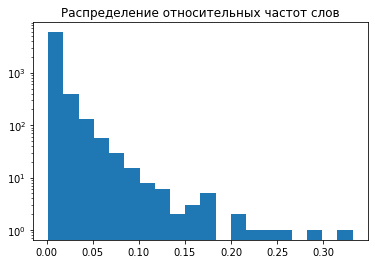

In [127]:
plt.hist(word_doc_freq, bins=20)
plt.title('Распределение относительных частот слов')
plt.yscale('log');

In [128]:
VECTORIZATION_MODE = 'tfidf'
# построение матрицы признаков по методу мешка слов
# функция vectorize_texts принимает на вход
#1. токенизированные список списков
#2. словарь
#3. вектор частоты токенизированны
#4. алгоритм взвешивания токенов по частоте mode - есть 4 алгорима - bin,tf,idf,tfidf
#5. флаг чтобы перемаштабировать флаг после взвешивания

train_vectors = vectorize_texts(train_tokenized, vocabulary, word_doc_freq, mode=VECTORIZATION_MODE)

print('Размерность матрицы признаков обучающей выборки', train_vectors.shape)
print()
print('Количество ненулевых элементов в обучающей выборке', train_vectors.nnz)
print('Процент заполненности матрицы признаков {:.2f}%'.format(train_vectors.nnz * 100 / (train_vectors.shape[0] * train_vectors.shape[1])))
print()

Размерность матрицы признаков обучающей выборки (2759, 6574)

Количество ненулевых элементов в обучающей выборке 153443
Процент заполненности матрицы признаков 0.85%



In [129]:
model_t = api.load('glove-twitter-100')

In [130]:
from gensim import utils

def get_vectors_gt100(row):
    '''
      word_doc_freq # частоты слов
      train_tokenized #сами слова
    '''
    vecs = [np.zeros(100)]
    for word in row:
        #print(row)
        try: 
            # если слово есть в нашем очищенном словаре
            # умножаем вектор на вес tfidf
            v = model_t[word] * word_doc_freq[vocabulary[word]] 
        except:
            v = np.zeros(100)
        vecs.append(v)
    return np.sum(np.array(vecs),axis=0)

In [131]:
train_gt100 = np.array([get_vectors_gt100(i) for i in train_tokenized])
val_gt100 = np.array([get_vectors_gt100(i) for i in val_tokenized])

In [132]:
model_t.most_similar(positive=['инвестор', 'рынок'], topn=1)

[('аналитик', 0.7176759243011475)]

In [139]:
clf = LogisticRegression(random_state=12, max_iter=500)
clf.fit(train_gt100, y_train)

print(clf.__class__)

pred = clf.predict(val_gt100)

score = accuracy_score(pred, y_val)
print(f'Score = {score}')
print(f'Balance = {balance}')
print(f'Val balance = {y_val.sum() / y_val.shape[0]}')

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Score = 0.5840579710144927
Balance = 0.5208333333333333
Val balance = 0.47246376811594204


In [134]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=4, n_estimators=50)

rf.fit(train_gt100, y_train)

score = (y_val == rf.predict(val_gt100)).mean()
print(f'Score = {score}')
print(f'Balance = {balance}')

Score = 0.5405797101449276
Balance = 0.5208333333333333


In [135]:
import catboost as cb

np.random.seed(12)

params = dict(
    learning_rate=0.025,
    iterations=10000,
    reg_lambda=0.0005,
    colsample_bylevel=1.,
    max_bin=80,
    bagging_temperature=2,
    use_best_model=True,
    verbose=False,
    grow_policy='Depthwise',
    random_seed=12
)
model = cb.CatBoostClassifier(
    **params,
)

eval_set = cb.Pool(data=val_gt100, label=y_val)
model.fit(train_gt100, y_train, eval_set=eval_set, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [136]:
pred = model.predict(val_gt100)

score = accuracy_score(pred, y_val)
print(f'Score = {score}')
print(f'Balance = {balance}')

Score = 0.5405797101449276
Balance = 0.5208333333333333
